# import librairies

In [47]:
import glob
import imageio
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

# File reading

In [43]:
# different features
flat_files = glob.glob("screenshots\\flatlayers\\bw\\*.png")
salt_files = glob.glob("screenshots\\salt\\bw\\*.png")
gasc_files = glob.glob("screenshots\\gas_chimney\\bw\\*.png")

# images in
flat_im = [imageio.imread(im) for im in flat_files]
salt_im = [imageio.imread(im) for im in salt_files]
gasc_im = [imageio.imread(im) for im in gasc_files]

print(len(flat_im), len(salt_im), len(gasc_im))

114 90 65


Example images

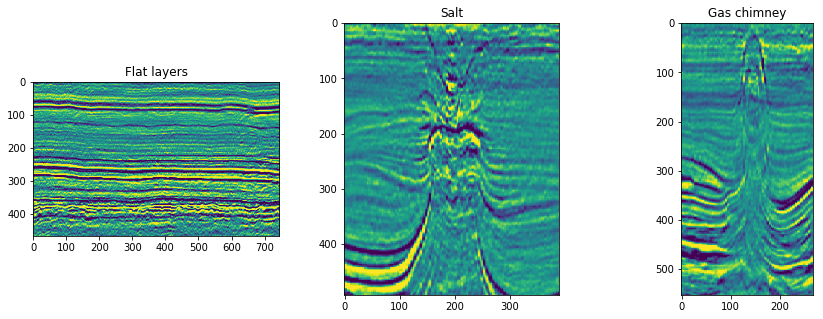

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(np.array(flat_im[random.randint(0, len(flat_im)-1)].tolist())[:,:,0])
plt.title('Flat layers')
plt.subplot(1,3,2)
plt.imshow(np.array(salt_im[random.randint(0, len(salt_im)-1)].tolist())[:,:,0])
plt.title('Salt')
plt.subplot(1,3,3)
plt.imshow(np.array(gasc_im[random.randint(0, len(gasc_im)-1)].tolist())[:,:,0])
plt.title('Gas chimney')
plt.show()

# Split the data

Split randomly between training and validation data: test data have already been keep appart

# Feature extraction

Extract features from the images. Each images being filtered with edge detection, gabor, mean

Noise feature

In [14]:
from skimage.restoration import estimate_sigma

def estimate_noise(img):
    return estimate_sigma(img, multichannel=True, average_sigmas=True)

Mean and standart deviation

In [17]:
def m_std ( img ):
    m = np.mean( img )
    std = np.std( img )
    return ( m, std )

Haralick features

In [ ]:
def extract_features(image):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)

        # take the mean of it and return it
        ht_mean = textures.mean(axis=0)
        return ht_mean

Test features

In [27]:
estimate_noise( salt_im[9] )

0.370650554626404

Feature extraction and gathering into a single dataframe

# Feature selection

reduce number of features to save computing time and avoid overfiting

In [12]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define selected number of features wanted
num_selected_ft = 6

# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# Feature Extraction with RFE - Recursive feature elimination

# feature extraction
model = LogisticRegression()
rfe = RFE(model, num_selected_ft)
fit = rfe.fit(X, Y)
print("Num Features: " + str(fit.n_features_))
print("Selected Features: %s" + str(fit.support_))
print("Feature Ranking: %s"+ str(fit.ranking_))

Num Features: 6
Selected Features: %s[ True  True  True False False  True  True  True]
Feature Ranking: %s[1 1 1 2 3 1 1 1]


C:\Users\qc16\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qc16\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qc16\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Model selection

In [ ]:
classifiers = {
    "Linear SVM": SVC(),
    "Random forest": RandomForestClassifier(),
    "Neural network": MLPClassifier(random_state = 666),
    "XG_boost": GradientBoostingClassifier()
}

# iterate over classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_val, y_val)
    print("{:12} {}".format(name,"-"*15))
    print(classification_report(y_val, clf.predict(X_val), digits=3))

# Build model

Hyper parameter analysis, fit and save the model

# Prediction analysis

Confusion matrix, classification_report: precision, recall, f1-score